# CSC 314: Final Exam

This final exam is similar to the projects we have been working on in Chapter 5, 6, and 7 of the textbook.

1. Pandas & COVID-19 (20 points)
* Euclidean Distance (5 points)
* Distance to Neighbors (5 points)
* Distance to Neighbor Groups (10 points)
* Data Transformation (10 points)
* K-Nearest Neighbors (10 points)
* Red Eye Removal (20 points)
* Color Enhancing Filter (20 points)

Do not consult other people for help. You may use the book, your notes, and standard internet resources.

Please submit your work as a python notebook.

## 1. COVID-19 Deaths Yesterday: Top-10 Counties in US (20 points)

We are interested in learning which counties in the United States had the most deaths attributed to COVID-19 yesterday. This information is available from the John Hopkins University COVID-19 GitHub repository.

Write a program that creates a Pandas DataFrame from the JHU COVID-19 data. It should print out the **row indices** and four columns: **State**, **County**, **Population**, and **Deaths**. The number of deaths must be the number of deaths recorded for the last day in the file (i.e., yesterday's daily count). Only the 10 counties with the *most* deaths should be displayed.

**Hint 1:** Remember that JHU publishes cumulative death numbers, so you will need to perform some simple math with the last two columns in the data.

**Hint 2:** The DataFrame function `sort_values(column_name)` will be helpful. By default this function sorts in ascending order. You can change the order by passing the value `ascending=False`.  We can solve the problem using ascending order or using descending order, the choice is yours.

In [ ]:
import pandas as pd

# Downloads the data from 
covid_path = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/"
covid_file = "time_series_covid19_deaths_US.csv"
covid = pd.read_csv(covid_path + covid_file, delimiter=",")
covid = covid.rename(columns={"Admin2":"County", "Province_State":"State"})
unused_columns = ["UID", "iso2", "iso3", "code3", "FIPS", "Long_", "Lat", "Country_Region", "Combined_Key"]
covid = covid.drop(columns=unused_columns)
last_col = covid.shape[1]-1
for col in range(last_col, 3, -1):
    covid.iloc[:,col] = covid.iloc[:,col] - covid.iloc[:,col-1]
covid["Deaths"] = covid.sum(axis=1) - covid["Population"]

#first_column = covid.columns.get_loc("1/22/20")
#last_column = covid.shape[1]-1
#dates = covid.loc[county][first_column:last_column]
#
#covid.drop(columns=dates)
covid.head()

# I couldn't isolate the dates to drop them




# Testing -- WARNING: THIS REPORT WAS GENERATED FROM DECEMBER 5ths DATA
#             State        County  Population  Deaths
#213     California   Los Angeles    10039107      60
#1642      Missouri     St. Louis      994205      49
#2767         Texas       El Paso      839238      44
#108        Arizona      Maricopa     4485414      39
#640       Illinois          Cook     5150233      29
#2380  Pennsylvania  Philadelphia     1584064      28
#382        Florida    Miami-Dade     2716940      20
#2754         Texas        Dallas     2635516      19
#2199          Ohio        Summit      541013      19
#204     California        Fresno      999101      18

## 2. Euclidean Distance (5 points)

**This question comes straight from your homework. Read the entire question and feel free to use your homework solution**

The Euclidean Distance is defined as the distance of a line segment connecting two points. In two dimensional space, it can be thought of as finding the hypotenuse of a triangle using the Pythagorean Theorem and a similar equation holds true for points in N-dimensional space.

$$d=\sqrt{(X_{2}-X_{1})^{2}+(Y_{2}-Y_{1})^{2}+(Z_{2}-Z_{1})^{2}+\ldots}$$

Write a function `EuclidDist` that will calculate the distance between two points of arbitrary dimension. It is safe to assume that both points are given as parallel, iterable objects. Your function should round each Euclidean Distance to a single decimal point.

In [ ]:
from math import sqrt

def EuclidDist(point1, point2):

    distance = 0
    
    dims = 0
    for i in range(len(point1)):
        dims += (point1[i]-point2[i])**2
    distance = sqrt(dims)
    
    return round(distance, 1)


# Testing
result1 = EuclidDist((8,7), (2,6))
result2 = EuclidDist((8,7), (7,11))
result3 = EuclidDist((8,7), (14,3))

print(result1) # 6.1
print(result2) # 4.1
print(result3) # 7.2

## 3. Distance to Neighbors (5 points)

**This question requires the `EuclidDist` function to work properly**

Consider a graph with one single test point and a set of neighboring points. Our task is to generate a list of the Euclidean Distance from the test point to all of the neighbors. If the test point is at $(8,7)$ and the neighbors are $(2, 6), (7, 11), (14, 3)$, then the calculated distances would be $(6.1), (4.1), (7.2)$.

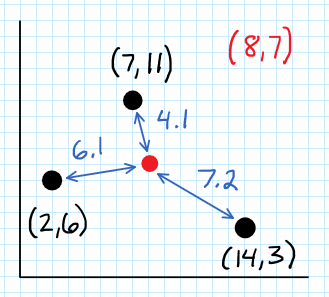

Write a function `CalculateDistanceToNeighbors` that will generate a list of Euclidean Distances from a point to each of its neighbors.

In [ ]:
def CalculateDistanceToNeighbors(test_point, neighbor_list):
    
    neighbor_distances = []
    
    for i in range(len(neighbor_list)):
        distance = EuclidDist(test_point, neighbor_list[i])
        neighbor_distances.append(distance)
 

    return neighbor_distances


# Testing
result1 = CalculateDistanceToNeighbors((8,7), [(2,6), (7,11), (14,3)])
result2 = CalculateDistanceToNeighbors((8,7), [(12, 15), (16, 10)])

print(result1) # [6.1, 4.1, 7.2]
print(result2) # [8.9, 8.5]

## 4. Distance to Neighbor Groups (10 points)

**This question requires the `CalculateDistanceToNeighbors` to work properly.**

Let's expand the previous problem and now consider a graph with one single test point (red) and a multiple groups of neighbors (black and green). Our task is to generate a list of the Euclidean Distance from the test point to all of the neighbors and to keep track of which neighbor group each distance goes to (black or green).

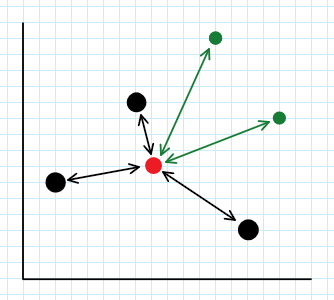

Assume that all of the points in each group of neighbors will be given in a list, and that the neighbor groups are themselves contained in a list.
```
In:  neighbors_group_0 = [(2, 6), (7, 11), (14, 3)]            # black points
     neighbors_group_1 = [(12, 15), (16, 10)]                  # green points
     neighbor_groups = [neighbors_group_0, neighbors_group_1]  # group_0 is at index 0 and group_1 is at index 1
```

The output should be a doubly-nested list where the outer list contains each neighbor group and each inner list contains the Euclidian Distance to each point in the group. The output list should be parallel with the input list so that first group in the input corresponds to the first group in the output.

```
In:  CalculateEuclidDistToNeighborGroups(neighbor_groups)
Out: [group_0_distance_LIST, group_1_distance_LIST, ...]
```

Write a function `CalculateDistanceToGroups` that calculates the Euclidian Distance between the test point and every neighbor point in each of the neighbor groups.

In [ ]:
def CalculateDistanceToGroups(test_point, neighbor_group_list):

    neighbor_group_distances = []
    
    for i in range(len(neighbor_group_list)):
        distance = CalculateDistanceToNeighbors(test_point, neighbor_group_list[i])
        neighbor_group_distances.append(distance)
            
    return neighbor_group_distances


# Testing
neighbors_group_0 = [(2,6), (7,11), (14,3)]
neighbors_group_1 = [(12, 15), (16, 10)]
neighbor_groups = [neighbors_group_0, neighbors_group_1]

result = CalculateDistanceToGroups((8,7), neighbor_groups)

print(result)  # [[6.1, 4.1, 7.2], [8.9, 8.5]]

## 5. Data Transform (10 points)

**This function can stand on its own, you do not need to finish the previous problems to get it working correctly.**

An important part of computer science is putting data into a data structure that is well-suited for the desired algorithm. It often requires you to transform data from one format to another. In this problem, you will take a nested list of Euclidean Distances and convert it to a single-deep list that contains the Euclidean Distance and the index of the list it came from.

Write a function `TransformNeighborGroupData` that converts the doubly-nested distance-to-neighbors data into a list of tuples that contain each distance and the index of the neighbor group it came from.

In [ ]:
def TransformNeighborGroupData(neighbor_distance_lists):
    
    transformed_group_list = []
    
    for i in range(len(neighbor_distance_lists)):
        for x in neighbor_distance_lists[i]:
            transformed_group_list.append((x,i))

    return transformed_group_list


# Testing
neighbor_group = [
  [6.1, 4.1, 7.2],   # group is at index 0
  [8.9, 8.5]         # group is at index 1
]

result = TransformNeighborGroupData(neighbor_group)

print(result)  # [(6.1, 0), (4.1, 0), (7.2, 0), (8.9, 1), (8.5, 1)]

## 6. K-Nearest Neighbors (10 points)

**This function will require `CalculateDistanceToGroups` and `TransformNeighborGroupData` to work properly, but you can still receive points on it even if the child-functions do not work.**

The K-Nearest Neighbors algorithm is a *classification* algorithm that is somewhat similar to the K-Means *clustering* algorithm. The key difference is that K-Means assigns all of the datapoints to various groups from completely unknown data whereas K-Nearest Neighbor is used to classify a *new datapoint* into an existing group. In this way, K-Means can be used as a data mining algorithm and K-Nearest Neighbors can be used for Machine Learning.

To classify a new datapoint into one of the existing groups, K-Nearest Neighbors examines all of the previously known datapoints to find the closest neighbors to the new datapoint. Specifically, it finds the "k" nearest neighbors where "k" is usually a small number like 3, 5, or 7. K-Nearest Neighbors classifies the new datapoint into whichever neighbor group is most represented.

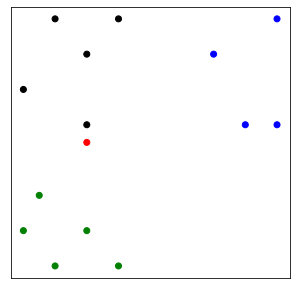

For example, there are three groups of data that are all known ahead of time: the black group, the green group, and the blue group. A new point (red) has been added to the dataset. If the value of "k" is three, then K-Nearest Neighbors will find the three closest neighbors and assign the new datapoint to whichever group has the greatest representation.

In the diagram above, it's easy to see that the closest neighbor to the new red datapoint is black. But it's hard to tell which of the remaining neighbors are closest. If green has the most neighbors, then the new datapoint will be classified as green. If black has the most neighbors, then the new datapoint will be classified as black. Since we have chosen "k" to be three, only the closest three neighbors are considered.

**You implemented K-Means as part of your project. You are going to implement K-Nearest Neighbors as part of the final exam.**

The first part of the K-Nearest Neighbors algorithm uses code that you have already written to generate a list of Euclidean Distances from the new datatpoint to every single one of the other datapoints. In addition to including the Euclidean Distance, this list also identifies which neighbor group each distance corresponds to. This step can be completed using `CalculateDistanceToGroups` and `TransformNeighborGroupData`.

Write the first part of the K-Nearest Neighbors algorithm below. All that you need to do is to plugin your two existing functions.

In [ ]:
k = 3

# Neighbor Groups
neighbors_group_0 = [(7,8), (9,6), (8,6), (9, 9)]
neighbors_group_1 = [(1.5,4), (2,2), (1,3), (4,2), (3,3)]
neighbors_group_2 = [(1,7), (2,9), (3,8), (3,6), (4,9)]

neighbors_list = [neighbors_group_0, neighbors_group_1, neighbors_group_2]
neighbor_colors = ['b', 'g', 'k']

mystery_point = (3, 5.5)

# COMPLETE THE FIRST PART OF THE K-NEAREST NEIGHBORS ALGORITHM HERE
all_neighbor_distances = CalculateDistanceToGroups(mystery_point, neighbors_list)
transformed_neighbors = TransformNeighborGroupData(all_neighbor_distances)


# Testing
print(transformed_neighbors[:5])   # [(4.7, 0), (6.0, 0), (5.0, 0), (6.9, 0), (2.1, 1)]
print(transformed_neighbors[-5:])  # [(2.5, 2), (3.6, 2), (2.5, 2), (0.5, 2), (3.6, 2)]

**The second part of the K-Nearest Neighbors algorithm sorts the Euclidean Distance list.** It sorts the list using the Euclidean Distance as the sorting key and in doing so, it maintains the index of the neighbor group. This code has been completed for you.

In [ ]:
# CODE IS COMPLETE, THERE'S NOTHING FOR YOU TO DO HERE
sorted_neighbors = transformed_neighbors.copy()
sorted_neighbors.sort(key=lambda x: x[0])


# Testing (shows the beginning and end of the list)
print(sorted_neighbors[:5])   # [(0.5, 2), (2.1, 1), (2.5, 1), (2.5, 2), (2.5, 2)]
print(sorted_neighbors[-5:])  # [(3.6, 2), (4.7, 0), (5.0, 0), (6.0, 0), (6.9, 0)]

**The third part of the K-Nearest Neighbors algorithm takes the sorted tuples and drops the Euclidean Distances.*** It keeps the index number and maintains sorted order.

In [ ]:
# COMPLETE THE THIRD PART OF THE KNN ALGORITHM HERE
ordered_neighbor_indices = # PLUG IN CODE HERE


# Testing (shows the beginning and end of the list)
print(ordered_neighbor_indices[:5])   # [2, 1, 1, 2, 2]
print(ordered_neighbor_indices[-5:])  # [2, 0, 0, 0, 0]

**The fourth part of the K-Nearest Neighbors algorithm chooses the top "k" results.** The other results can be ignored or dropped.

In [ ]:
# COMPLETE THE FORTH PART OF THE KNN ALGORITHM HERE
closest_k_neighbors =  # PLUG IN CODE HERE

# Testing (shows the beginning and end of the list)
print(closest_k_neighbors)  # [2, 1, 1]

**Finish the K-Nearest Neighbors algorithm by finding the most common index in the list of nearest neighbors and graphing the result.**

In [ ]:
from kneighbors import PlotNearestNeighbors # THIS MODULE IS INCLUDED WITH THE FINAL EXAM
from statistics import mode

# IF YOU'VE DONE THE PREVIOUS STEPS CORRECTLY, THIS CODE SHOULD WORK
nearest_index = mode(closest_k_neighbors)
PlotNearestNeighbors(neighbors_list, neighbor_colors, mystery_point, nearest_index)

## 7. Red Eye Removal (20 points)

We spent quite a bit of class time creating image filters and our previous projects displayed two images side-by-side. One image was the original and other image was the filtered version. The red eye removal algorithm is different because it modifies the original image in-place and only shows the modified version. Since the red eye removal algorithm does not need to create a full duplicate of the image, it only processes a portion of the image: those pixels whose xy-coordinates are located near an eye. We identify each eye with a bounding box.

The red eye removal algorithm is actually quite simple, assuming that you were given a small bounding box around each eye:

```
Any pixel whose red component is 1.5 times it green component and 1.5 times it blue component will need to be corrected.
Red eye is corrected by reducing the red component by a factor of 4.
```

Here is an example of the algorithm on our test file.

#### <center>Original Image</center> ####
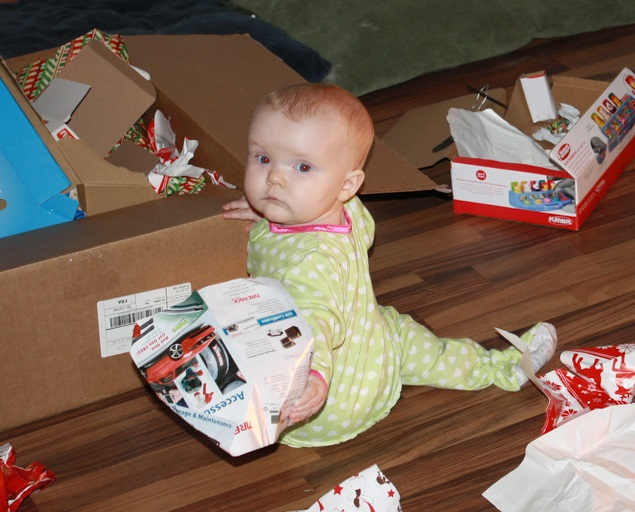

#### <center>Red Eye Removed</center> ####
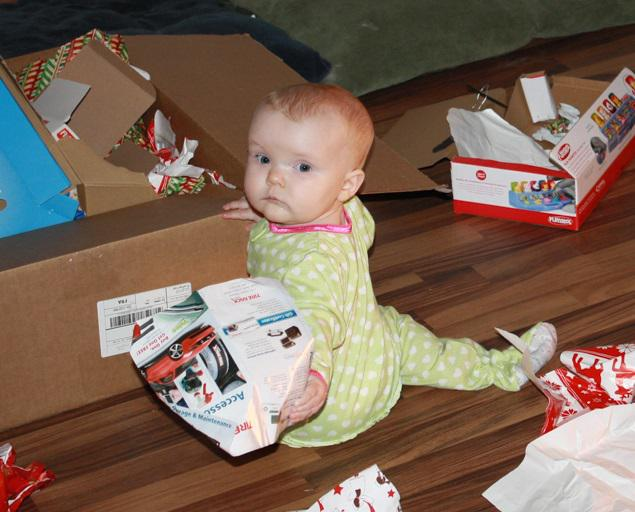


Right now the skeleton code opens a window that displays the original image. Your task is to complete the red eye removal function so that it removes the red eye from this picture of baby Hannah. Make sure that you download the `little_hannah.jpg` file and place it in the same directory as this notebook. For the `little_hannah.jpg` file, left-eye bounding box goes from $(247, 144) \rightarrow (277, 174)$ and the right-eye bounding box goes from $(287, 156) \rightarrow (317, 186)$.

Be careful because the y-axis is flipped: the smallest y-value is at the top of the image and largest y-value is at the bottom.

In [ ]:
import image

def remove_redeye(picture, bbox_left, bbox_top, bbox_right, bbox_bottom):

    # Step through all the pixels within this bounding box
    for x in range(bbox_left, bbox_right):
        for y in range(bbox_top, bbox_bottom):
            
            pixel = picture.getPixel(x, y)
            red = pixel.getRed()
            green = pixel.getGreen()
            blue = pixel.getBlue()
            # Any pixel whose red component is 1.5 times it green component and 1.5 times it blue component will need to be corrected.
            # Red eye is corrected by reducing the red component by a factor of 4.
            if(red >= 1.5 * green and red >= 1.5 * blue):
                pixel = image.Pixel(green,int(red/4),blue)
            
            picture.setPixel(x, y, pixel)

    return picture


# Open the image and then remove the red eye glare
picture = image.FileImage("little_hannah.jpg")
remove_redeye(picture, 247, 144, 277, 174)
remove_redeye(picture, 287, 156, 317, 186)

# Create the picture in a window
window = image.ImageWin(picture.getWidth(), picture.getHeight(), "Redeye Removal")
picture.draw(window)

# Hold the window until the user clicks somewhere on it
window.exitonclick()

## 8. Color Enhancing Contacts (20 points)

The image processing problems were well received by the class, so the second exam problem is to simulate color enhancing contacts. Specifically, we'll be enhancing blue eyes (because my daughters have pretty blue eyes). In fact, we'll do even more than just add blue contacts... we'll turn the rest of the image to grayscale so that her eyes really stand out.

The color enhancing contacts algorithm is a bit more complicated than the red eye removal algorithm because it has to examine every pixel and decide whether the pixel should be converted to grayscale or have the blues enhanced:

```
Any pixel outside the bounding box will be converted to grayscale
Within the bounding box, pixels with more blue than red and more blue than green are candidates to be enhanced. But these pixels are only enhanced if the blue component is LESS than 130.
To enhance a blue eye pixel: we multiply the blue component by 1.5, the green by 1.25, and the red by 1.25.
Each of the color components is capped at 255, the maximum allowed value
```

Here is an example of the algorithm on our test file.

#### <center>Original Image</center> ####
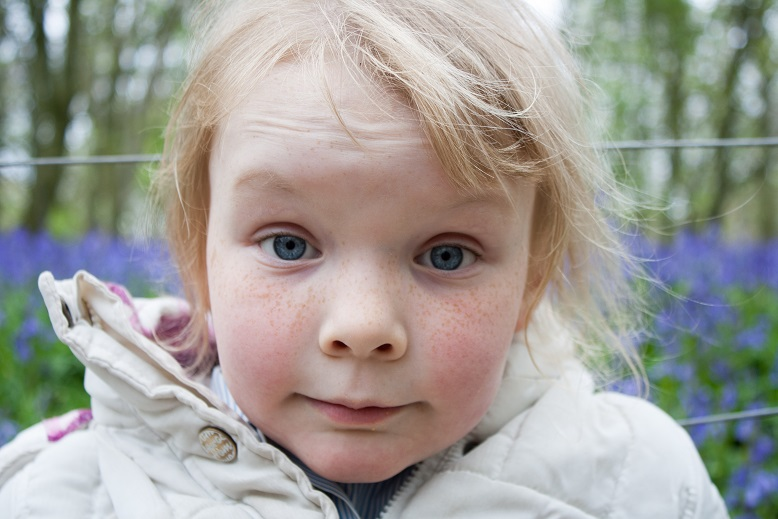

#### <center>Blue Eyes Enhanced</center> ####
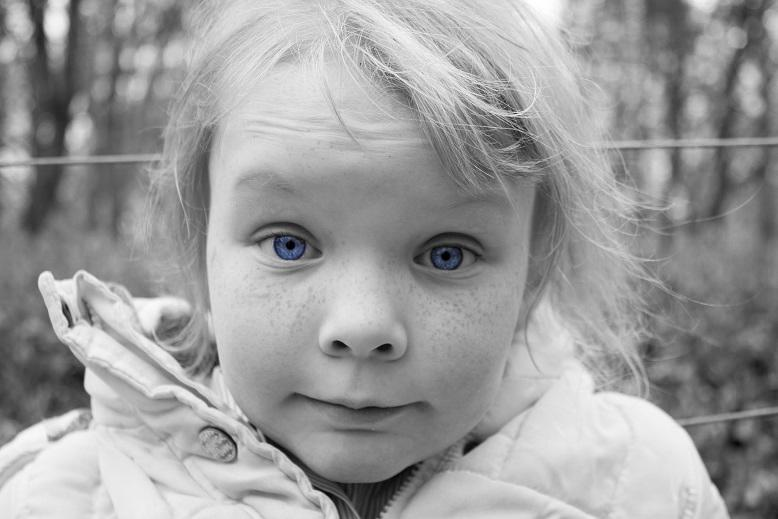

Right now the skeleton code opens a window that displays the original image. Your task is to complete the blue color enhancing contacts function so that it enhances the eyes of big Hannah and converts everything else to grayscale. Make sure that you download the `big_hannah.jpg` file and place it in the same directory as this notebook. For the `big_hannah.jpg` file, left-eye bounding box goes from $(225, 200) \rightarrow (500, 300)$.

Be careful because the y-axis is flipped: the smallest y-value is at the top of the image and largest y-value is at the bottom.

In [ ]:
import image

def blue_contacts(picture, bbox_left, bbox_top, bbox_right, bbox_bottom):

    width  = picture.getWidth()
    height = picture.getHeight()

    # Step through every pixel in the image
    for x in range(width):
        for y in range(height):
            
            pixel = picture.getPixel(x, y)
                       
            r = pixel.getRed()
            g = pixel.getGreen()
            b = pixel.getBlue()
            avgRGB = int((r+g+b)/3)
            
            if(x > bbox_left and x < bbox_right and y < bbox_bottom and y > bbox_top and b < 130 and b>g>r ):
                newPixel = image.Pixel(int(max(r*1.25,130)), int(max(g*1.25,130)), int(max(b*1.5,255)))
            else:
                newPixel = image.Pixel(avgRGB, avgRGB, avgRGB)
            
            picture.setPixel(x, y, newPixel)
            
    return picture


# Open the original image and enhance the eye color
picture = image.FileImage("big_hannah.jpg")
blue_contacts(picture, 225, 200, 500, 300)

# Create the picture in a window
window = image.ImageWin(picture.getWidth(), picture.getHeight(), "Color Enhancing Contacts")
picture.draw(window)

# Hold the window until the user clicks somewhere on it
window.exitonclick()

# END OF FINAL EXAM